<a href="https://colab.research.google.com/github/miz-ab/AgriTech-_USGS-LIDAR-Challenge/blob/master/AgriTech__USGS_LIDAR_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install earthpy

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [14]:
import os
from glob import glob
import matplotlib.pyplot as plt
import rasterio as rio
from rasterio.plot import plotting_extent
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [7]:
landsat_bands_data_path = "/content/drive/MyDrive/week_6_files/test.tif"
stack_band_paths = glob(landsat_bands_data_path)

In [8]:
stack_band_paths.sort()

In [9]:
stack_band_paths

['/content/drive/MyDrive/week_6_files/test.tif']

In [15]:
ds = gdal.Open("/content/drive/MyDrive/week_6_files/test.tif")
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

In [18]:
print(gt)

(-11669525.018, 1.0, 0.0, 4778714.607, 0.0, -1.0)


In [19]:
print(proj)

PROJCS["WGS 84 / Pseudo-Mercator",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["X",EAST],AXIS["Y",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +units=m +nadgrids=@null +wktext +no_defs"],AUTHORITY["EPSG","3857"]]


In [16]:
band = ds.GetRasterBand(1)
array = band.ReadAsArray()

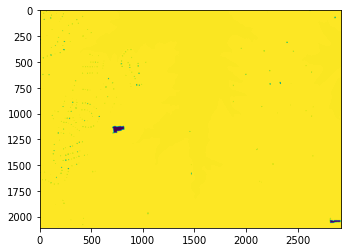

In [17]:
plt.figure()
plt.imshow(array)

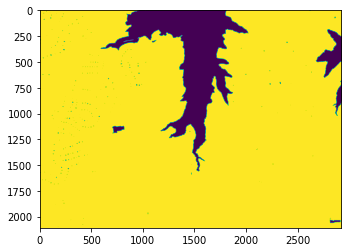

In [21]:
#manipulate into numpy array 
binmask = np.where((array >= np.mean(array)),1,0)
plt.figure()
plt.imshow(binmask)

In [24]:
#export to gdal file 
driver = gdal.GetDriverByName("GTiff")
driver.Register()
outds = driver.Create("/content/drive/MyDrive/week_6_files/binmask.tif", xsize = binmask.shape[1],
                      ysize = binmask.shape[0], bands = 1, 
                      eType = gdal.GDT_Int16)
outds.SetGeoTransform(gt)
outds.SetProjection(proj)
outband = outds.GetRasterBand(1)
outband.WriteArray(binmask)
outband.SetNoDataValue(np.nan)
outband.FlushCache()

In [25]:
# close our datasets and bands!!!
outband = None
outds = None